## Data Understanding

## Data Preprocessing

### Import Library

In [61]:
# Import Library
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

### Connect to gdrive

In [62]:
# Connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import dataset

In [63]:
# Import dataset

data = ('/content/drive/MyDrive/Portofolio/Prediksi skor kredit/')
df_train = pd.read_csv(data + 'application_train.csv')

### Show dataset

In [64]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


### Describe Dataset

In [67]:
df_train.shape

(307511, 122)

In [68]:
dict(df_train.dtypes)

{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMB

In [69]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Data Cleaning

In [71]:
df_train.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
dict(df_train.isnull().sum())

{'SK_ID_CURR': 0,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 12,
 'AMT_GOODS_PRICE': 278,
 'NAME_TYPE_SUITE': 1292,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 0,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 202929,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 96391,
 'CNT_FAM_MEMBERS': 2,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'ORG

In [73]:
df_train.dropna(inplace=True)

In [74]:
df_train[df_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


## EDA

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc140902610>,
      dtype=object)

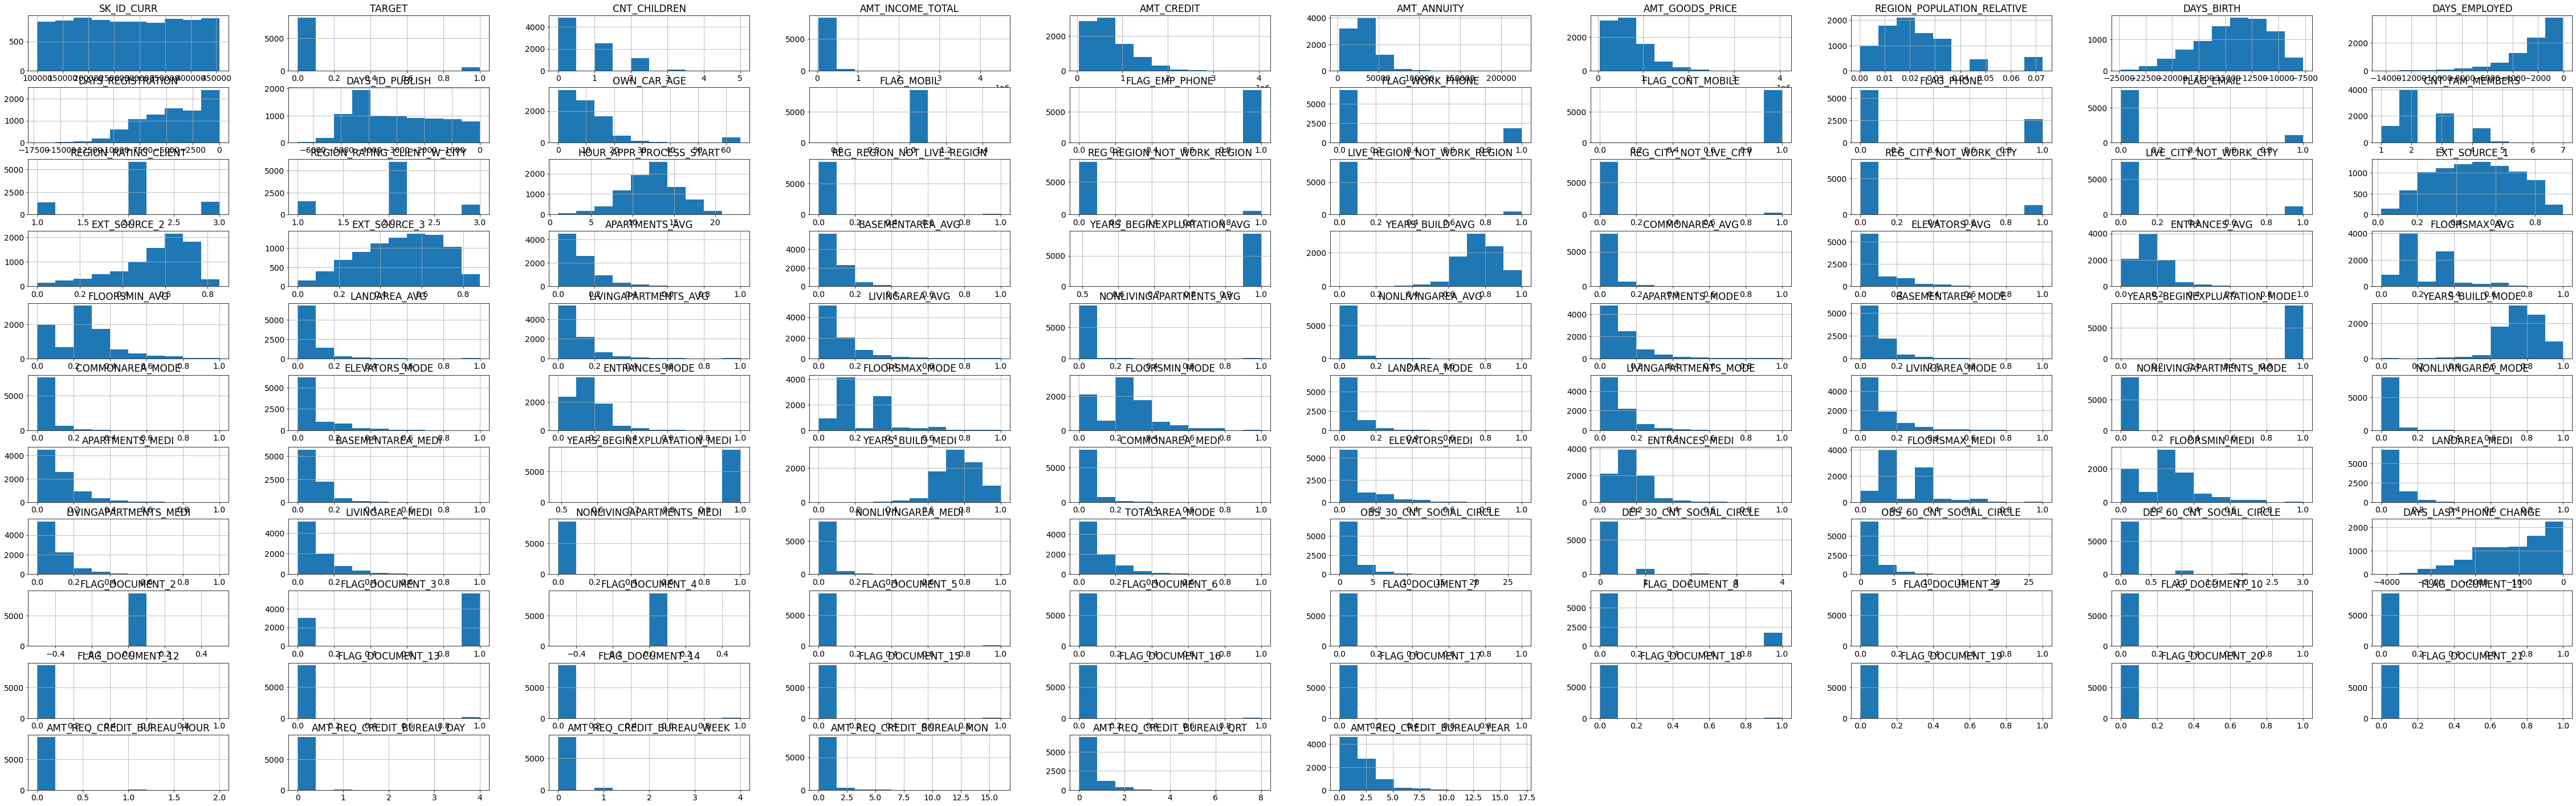

In [75]:
df_train.hist(figsize=(80,25))

### Boxplot

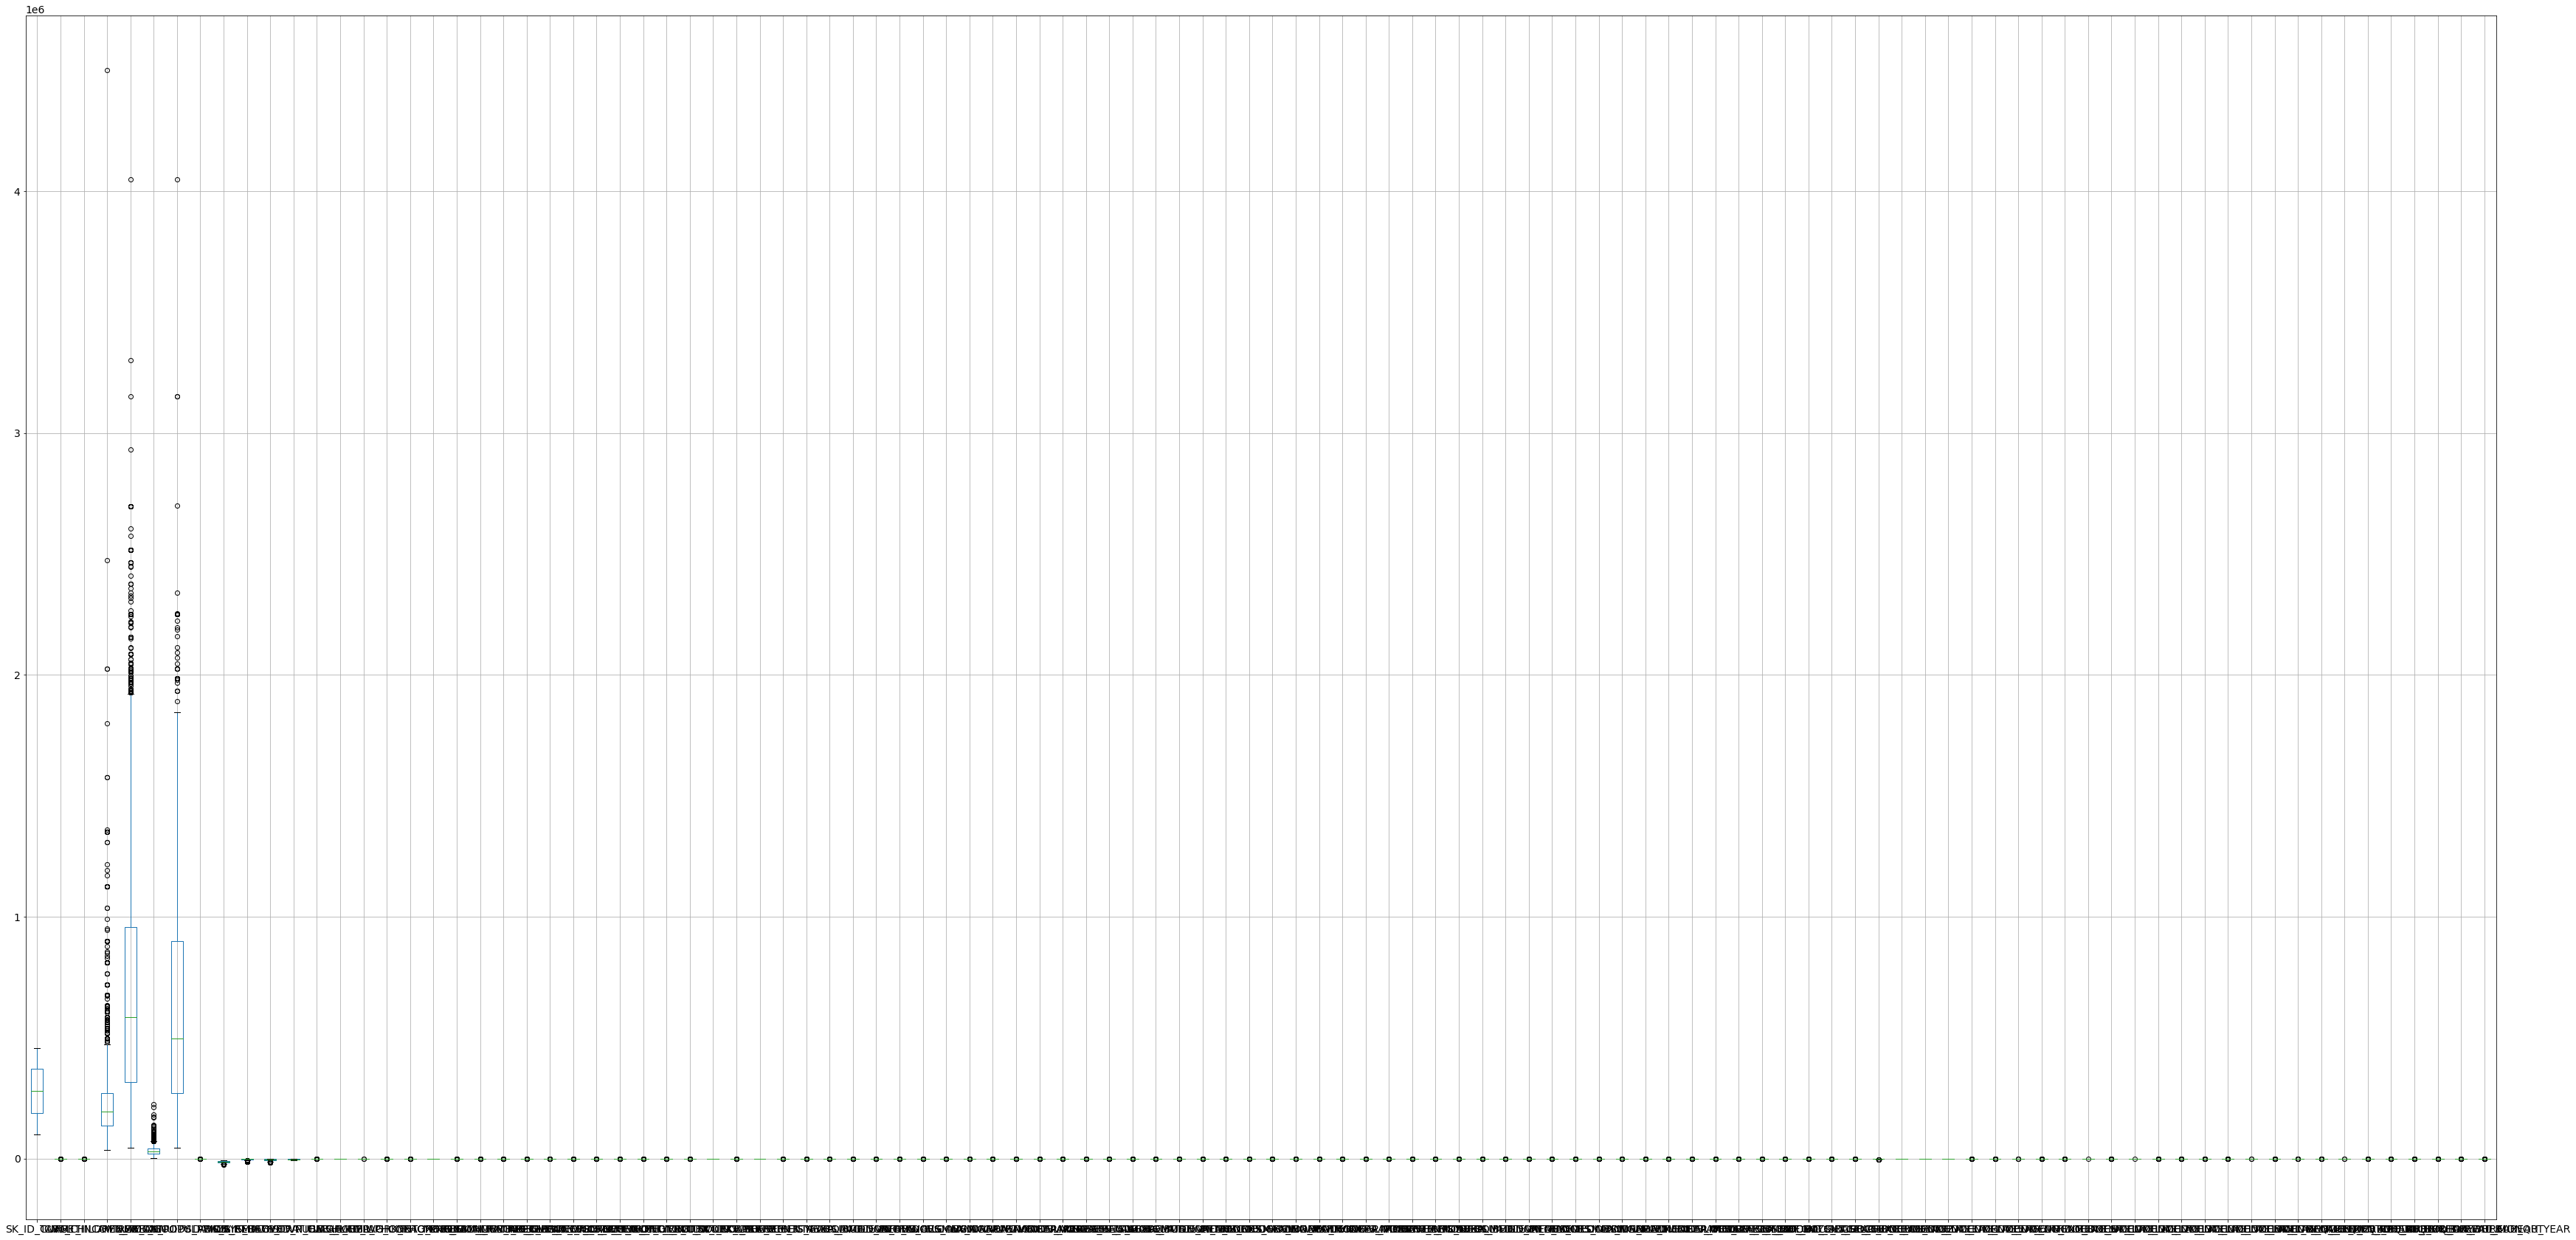

In [76]:
df_train.boxplot(figsize=(60,30))

### Count target value

In [77]:
df_train.TARGET.value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

In [78]:
print(df_train.TARGET.value_counts(normalize=True)*100)
print('\n')

0    93.885143
1     6.114857
Name: TARGET, dtype: float64




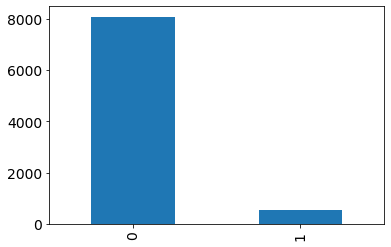

In [79]:
df_train.TARGET.value_counts().plot(kind='bar')

### Count target value based on gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

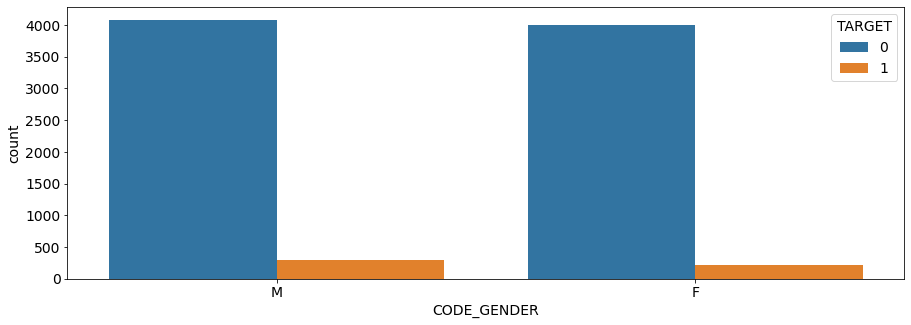

In [80]:
plt.figure(figsize= (15,5))
sns.countplot('CODE_GENDER', hue='TARGET', data=df_train)
plt.show

### Count target value based on age

In [81]:
df_train['Age'] = (df_train['DAYS_REGISTRATION']- df_train['DAYS_BIRTH'])/365

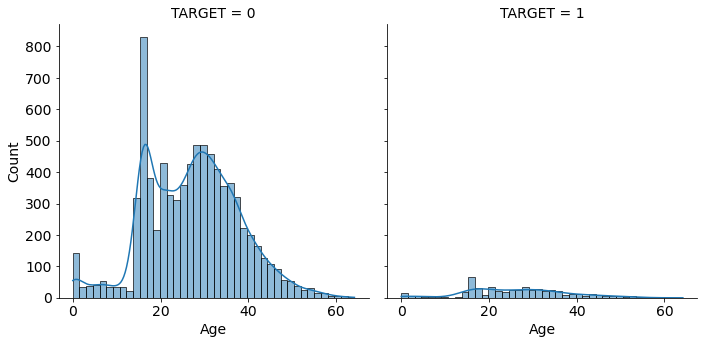

In [82]:
sns.displot(data=df_train, x='Age', col='TARGET', kde=True)
plt.show()

### Count target value basesd on contract type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

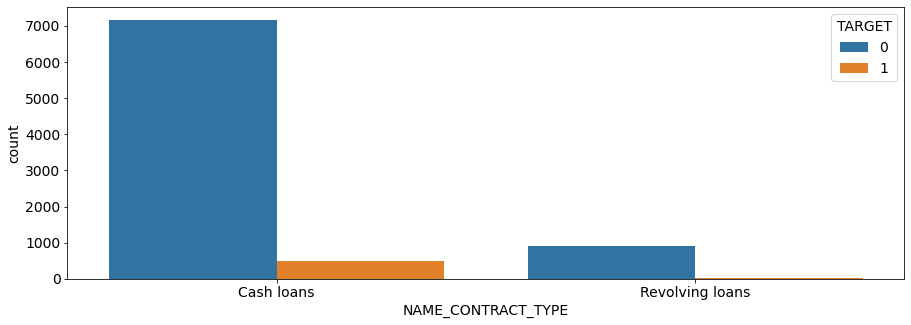

In [83]:
plt.figure(figsize= (15,5))
sns.countplot('NAME_CONTRACT_TYPE', hue='TARGET', data=df_train)
plt.show

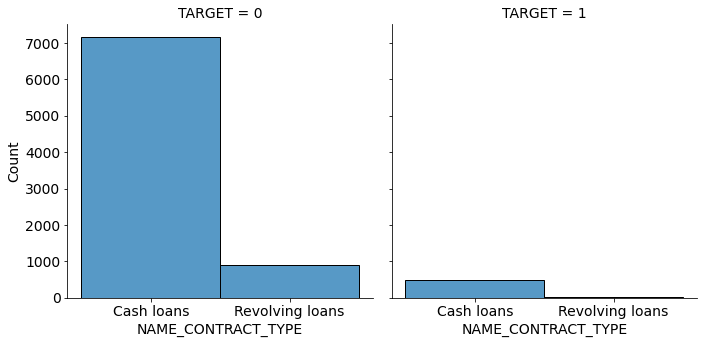

In [84]:
sns.displot(data=df_train, x='NAME_CONTRACT_TYPE', col='TARGET')
plt.show()

### Heatmap

In [85]:
plt.figure(figsize=(250, 100))

corr = df_train.corr()

sns.heatmap(data= corr, annot=True, fmt = '.2g', linewidth = 1)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Correlation

In [86]:
dict(df_train.corr()['TARGET'].sort_values(ascending=False))

{'TARGET': 1.0,
 'DAYS_EMPLOYED': 0.06295036668983989,
 'REGION_RATING_CLIENT_W_CITY': 0.06121399994630342,
 'FLAG_DOCUMENT_3': 0.0542690324073163,
 'REGION_RATING_CLIENT': 0.05361424825764553,
 'DAYS_BIRTH': 0.041107757776582064,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 0.03383216155736977,
 'OBS_30_CNT_SOCIAL_CIRCLE': 0.03104079560862153,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0.030729725272720193,
 'OWN_CAR_AGE': 0.028052368613941357,
 'DAYS_ID_PUBLISH': 0.02487680954790389,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0.022807146463697324,
 'FLAG_DOCUMENT_7': 0.021218216374528833,
 'DEF_60_CNT_SOCIAL_CIRCLE': 0.02079567310665902,
 'DAYS_LAST_PHONE_CHANGE': 0.019081738723005698,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0.016464913787210905,
 'SK_ID_CURR': 0.01547362692052464,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 0.015000283713139802,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0.014616213442839235,
 'FLAG_WORK_PHONE': 0.014212286669002712,
 'FLAG_DOCUMENT_19': 0.013975594987258144,
 'DAYS_REGISTRATION': 0.013710026979639557,
 'NONLIVINGAPARTMENTS_M

### Multicolinearity

In [87]:
# checking for multicollinearity

plt.figure(figsize = (100, 60))

corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Feature Engineering

### Drop column unnecessary

In [88]:
to_drop = ['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START']

df_train.drop(to_drop, inplace = True, axis = 1)

### Separate target columns

In [89]:
X = df_train.drop('TARGET', axis = 1)
y = df_train['TARGET']

### Label Encoding Categorical Values

In [90]:
for col in df_train.select_dtypes(include='object').columns.tolist():
    print(df_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         89.049058
Revolving loans    10.950942
Name: NAME_CONTRACT_TYPE, dtype: float64


M    50.930016
F    49.069984
Name: CODE_GENDER, dtype: float64


Y    100.0
Name: FLAG_OWN_CAR, dtype: float64


Y    68.774704
N    31.225296
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.399209
Family             11.415950
Spouse, partner     3.673564
Children            0.732388
Other_B             0.465008
Other_A             0.220879
Group of people     0.093002
Name: NAME_TYPE_SUITE, dtype: float64


Working                 58.707277
Commercial associate    32.969077
State servant            8.323646
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    54.010695
Higher education                 40.955592
Incomplete higher                 4.557080
Lower secondary                   0.406882
Academic degree                   0.069751
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 71.367124
Single / not married    13.473611
Ci

In [91]:
categorical = X.select_dtypes(include = ['object'])

In [92]:
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
71,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
124,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,Laborers,Self-employed,reg oper spec account,block of flats,Panel,No
152,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,Trade: type 7,reg oper account,block of flats,Monolithic,No
161,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Government,reg oper account,block of flats,Panel,No
255,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,Panel,No


In [93]:
for col in categorical.columns:
    print(f"{col}: \n{categorical[col].unique()}\n")

NAME_CONTRACT_TYPE: 
['Cash loans' 'Revolving loans']

CODE_GENDER: 
['M' 'F']

FLAG_OWN_CAR: 
['Y']

FLAG_OWN_REALTY: 
['Y' 'N']

NAME_TYPE_SUITE: 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE: 
['Working' 'Commercial associate' 'State servant']

NAME_EDUCATION_TYPE: 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS: 
['Married' 'Separated' 'Single / not married' 'Widow' 'Civil marriage']

NAME_HOUSING_TYPE: 
['House / apartment' 'With parents' 'Municipal apartment'
 'Office apartment' 'Co-op apartment' 'Rented apartment']

OCCUPATION_TYPE: 
['Laborers' 'Managers' 'Drivers' 'Core staff' 'Sales staff'
 'High skill tech staff' 'Medicine staff' 'Accountants'
 'Private service staff' 'Cooking staff' 'HR staff' 'Cleaning staff'
 'Security staff' 'Secretaries' 'IT staff' 'Realty agents'
 'Waiters/barmen staff' 'Low-skill Laborers']

ORGANIZATIO

In [94]:
categorical = pd.get_dummies(categorical, drop_first = True)

In [95]:
categorical.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_State servant,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
124,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
255,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Extract Numerical Values

In [96]:
numerical = X.select_dtypes(include = ['int64','float64'])

In [97]:
numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521


### Merge categorical and numerical value

In [98]:
X = pd.concat([numerical, categorical], axis = 1)

In [99]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


## Check Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

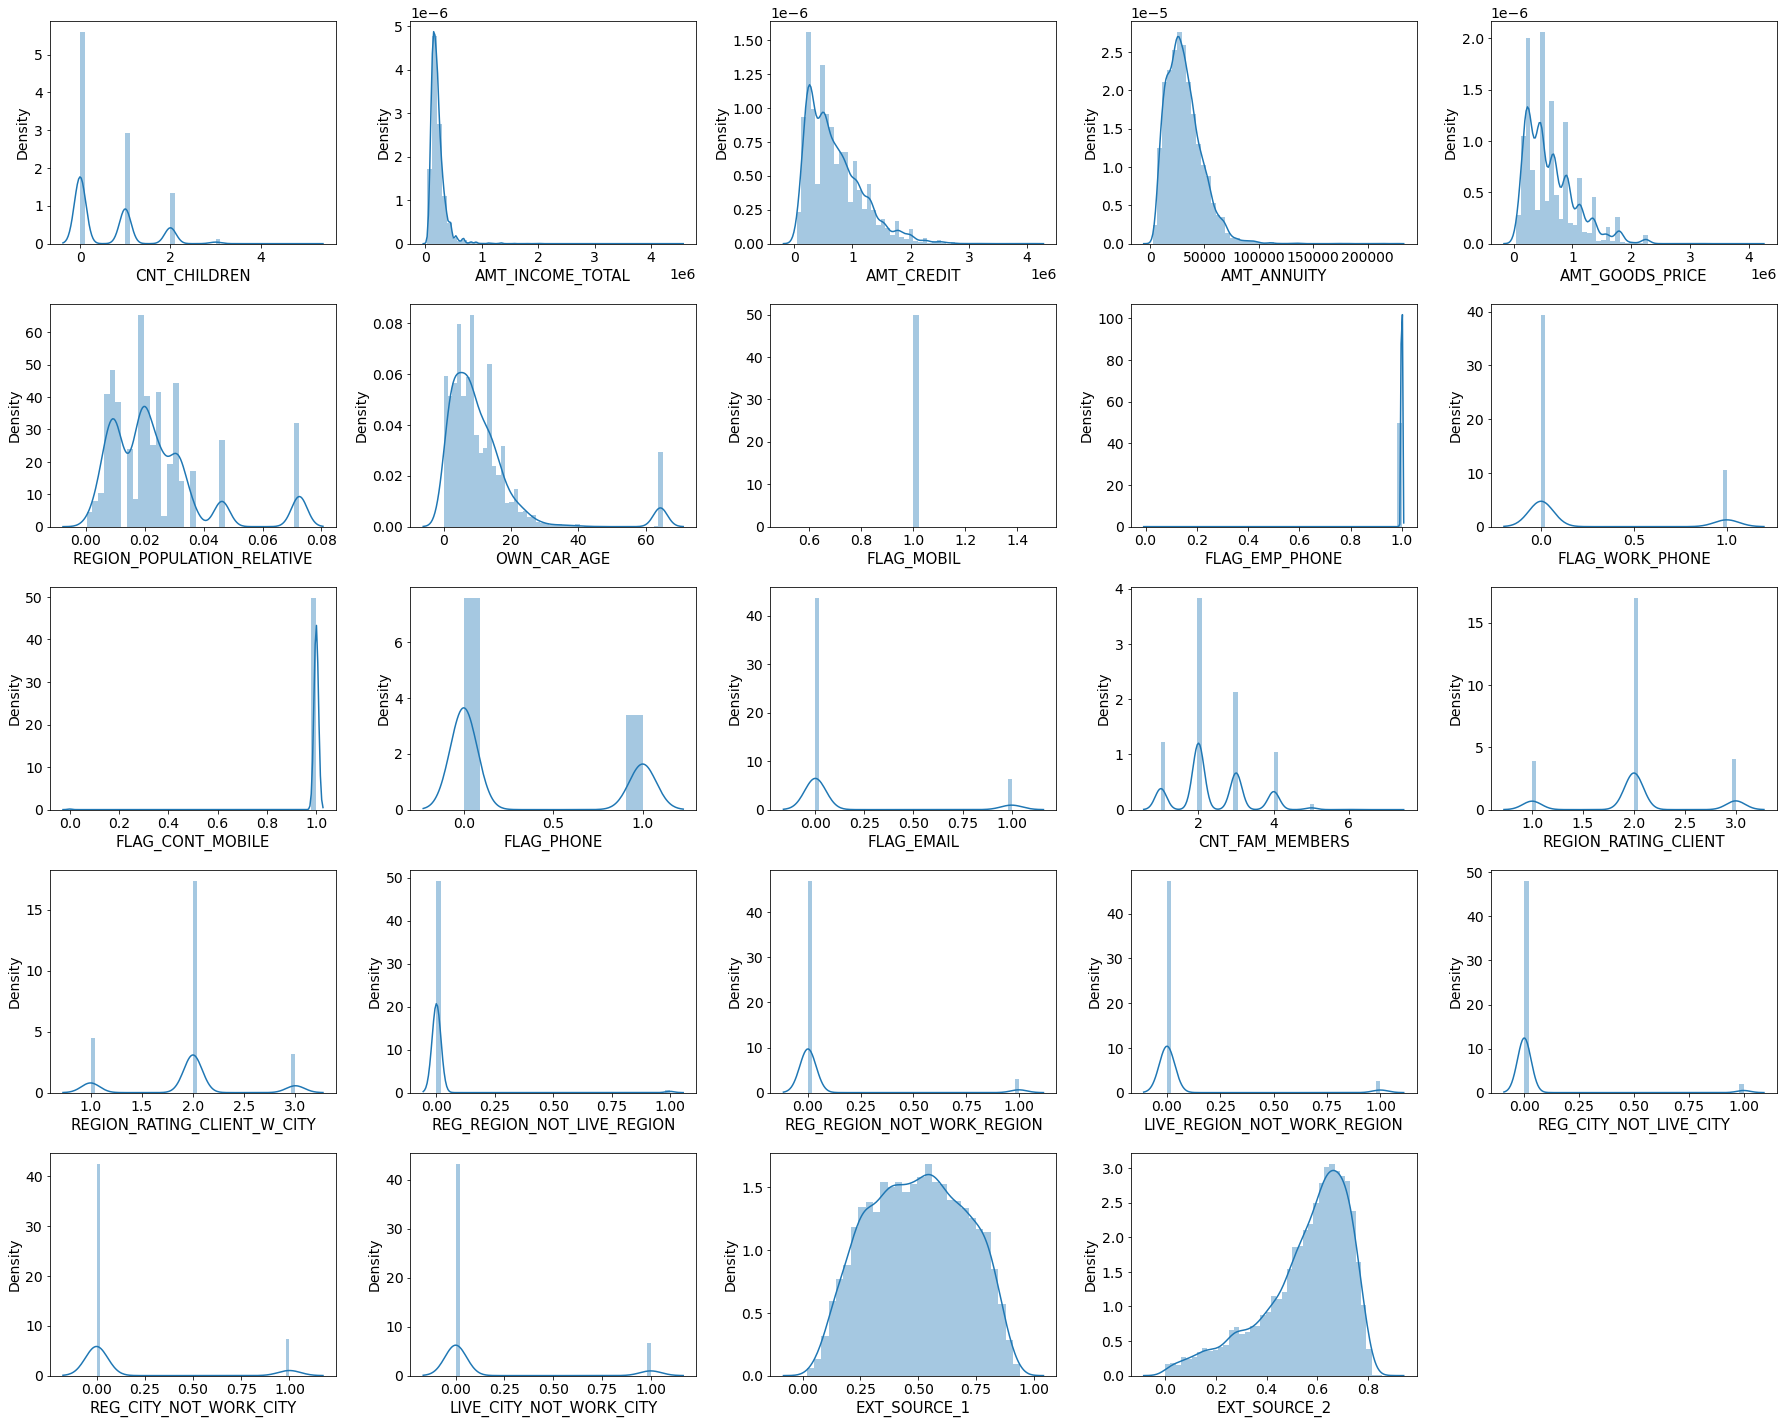

In [100]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

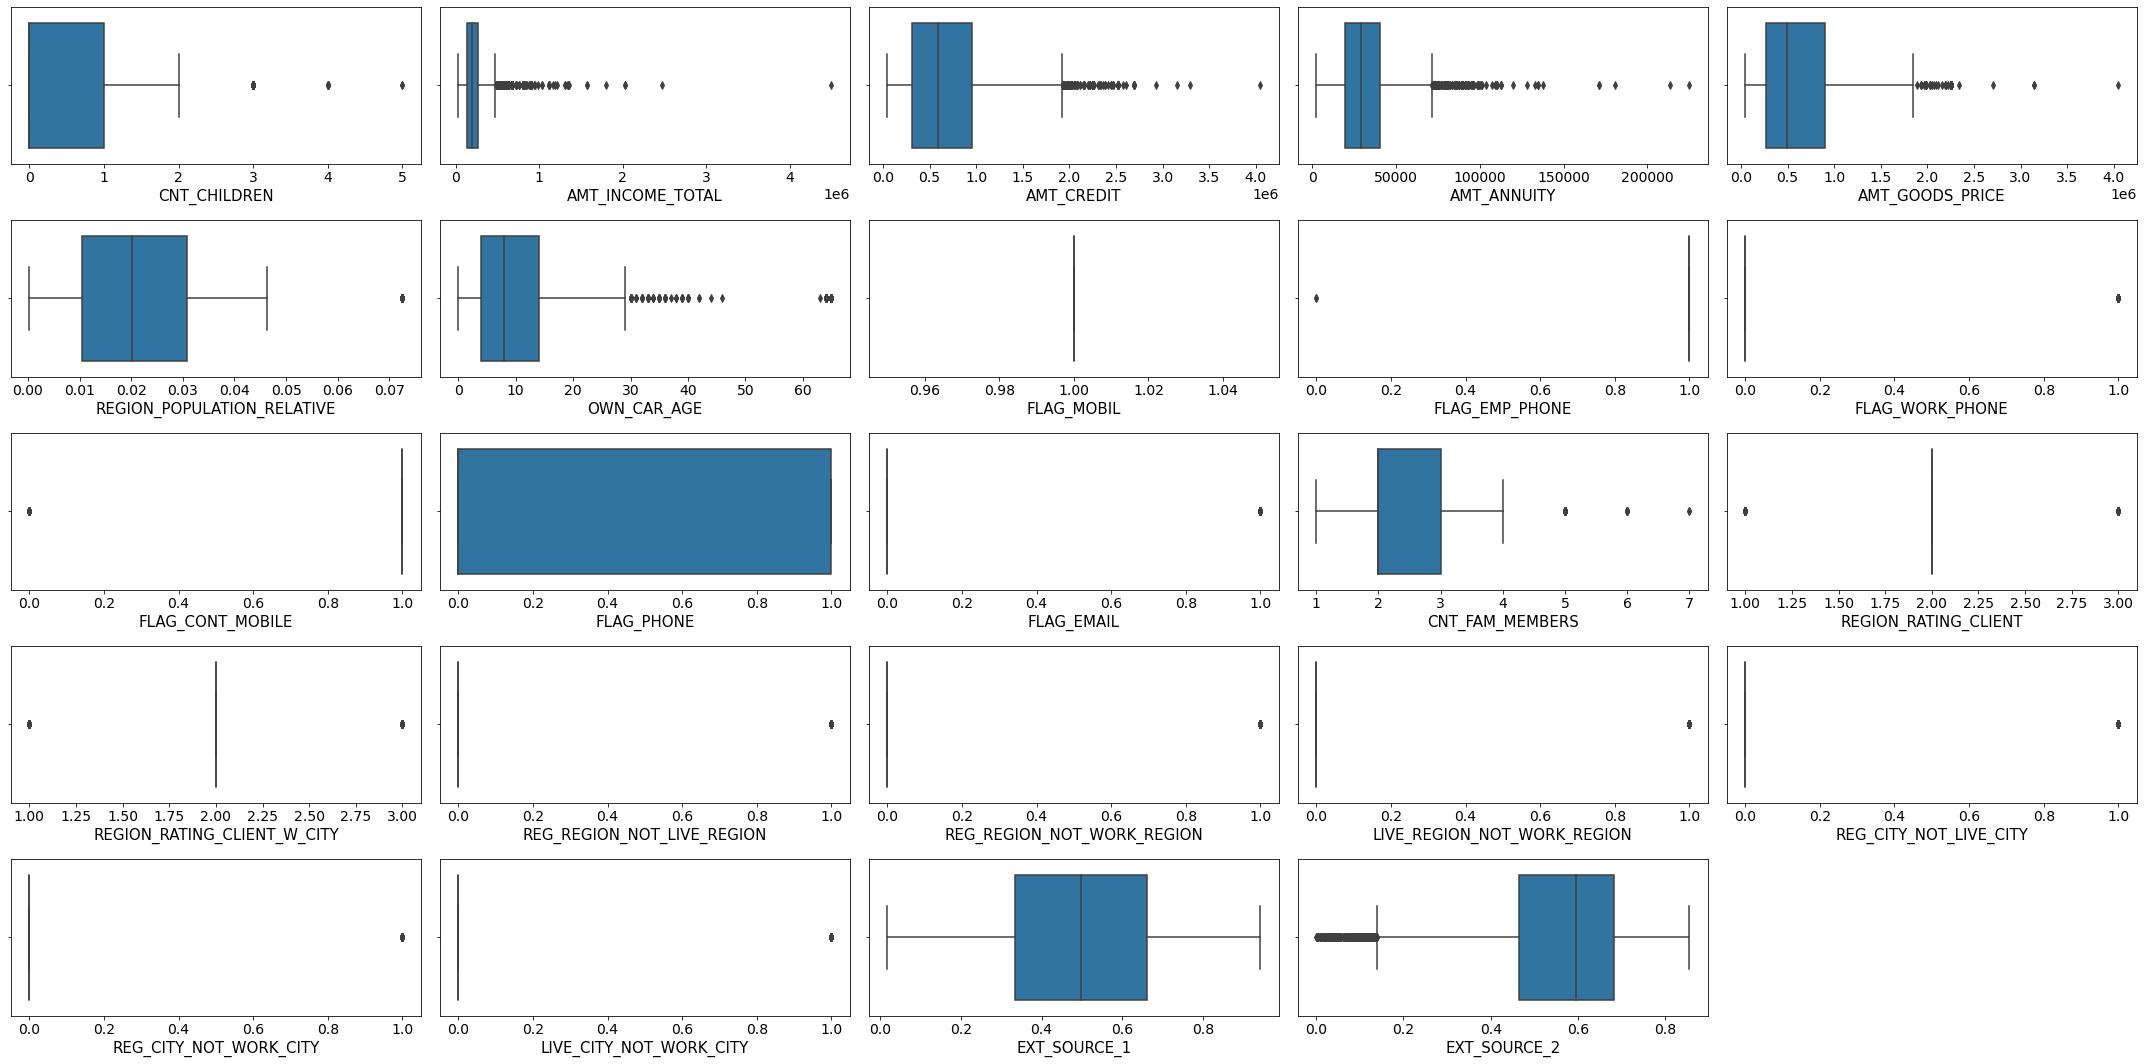

In [101]:
plt.figure(figsize = ( 30, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [102]:
X.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       ...
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=207)

### Handling Outliers

In [103]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'REGION_POPULATION_RELATIVE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_2']
for i in X[outlier_list]:
    X[i] = treat_outlier(X [i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

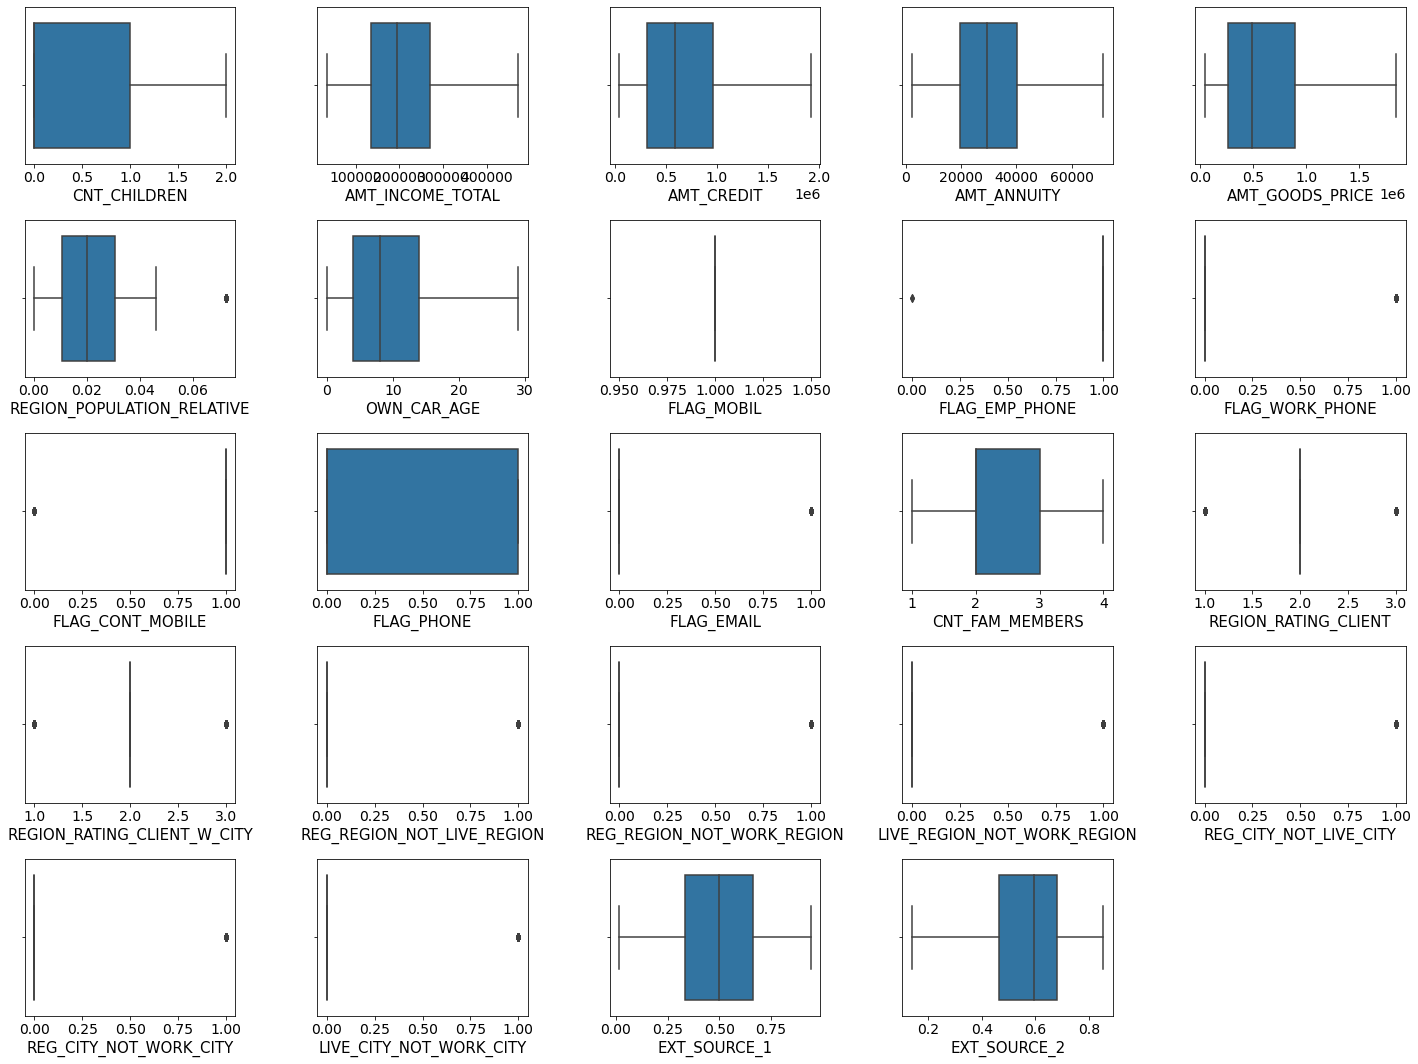

In [104]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## Split Dataset

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2)

In [106]:
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
300272,2.0,135000.0,848745.0,46174.500,675000.0,0.019689,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
98535,1.0,247500.0,207000.0,11358.000,207000.0,0.026392,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
143586,2.0,360000.0,1283197.5,37647.000,1120500.0,0.007274,4.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
161187,2.0,90000.0,270000.0,13500.000,270000.0,0.025164,9.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
37745,2.0,225000.0,1051245.0,37372.500,877500.0,0.019101,1.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58854,0.0,270000.0,972000.0,28417.500,972000.0,0.072508,3.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
144900,0.0,112500.0,521280.0,27292.500,450000.0,0.011703,13.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
86564,2.0,450000.0,922666.5,53946.000,796500.0,0.035792,3.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
197268,0.0,360000.0,1575000.0,62019.000,1800000.0,0.010006,6.0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [107]:
y_train

300272    0
98535     1
143586    0
161187    0
37745     0
         ..
58854     0
144900    0
86564     0
197268    0
189979    0
Name: TARGET, Length: 6881, dtype: int64

## Normalization

In [108]:
dict(X_train.dtypes)

{'CNT_CHILDREN': dtype('float64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'CNT_FAM_MEMBERS': dtype('float64'),
 'REGION_RATING_CLIENT': dtype('int64'),
 'REGION_RATING_CLIENT_W_CITY': dtype('int64'),
 'REG_REGION_NOT_LIVE_REGION': dtype('int64'),
 'REG_REGION_NOT_WORK_REGION': dtype('int64'),
 'LIVE_REGION_NOT_WORK_REGION': dtype('int64'),
 'REG_CITY_NOT_LIVE_CITY': dtype('int64'),
 'REG_CITY_NOT_WORK_CITY': dtype('int64'),
 'LIVE_CITY_NOT_WORK_CITY': dtype('int64'),
 'EXT_SOURCE_1': dtype('float64'),
 'EXT_SOURCE_2': dtype('float64'),
 'EXT_SOURCE_3': dtype('float64'),
 'APARTMENTS_AVG': dtype('float64

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train)

In [110]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
300272,2.0,135000.0,848745.0,46174.5,675000.0,0.019689,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
98535,1.0,247500.0,207000.0,11358.0,207000.0,0.026392,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
143586,2.0,360000.0,1283197.5,37647.0,1120500.0,0.007274,4.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
161187,2.0,90000.0,270000.0,13500.0,270000.0,0.025164,9.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
37745,2.0,225000.0,1051245.0,37372.5,877500.0,0.019101,1.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
X_train.isnull().sum()

CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
                                  ..
WALLSMATERIAL_MODE_Others          0
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_Yes            0
Length: 207, dtype: int64

## SMOTE

In [112]:
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  TARGET
0       0    6460
1       1    6460


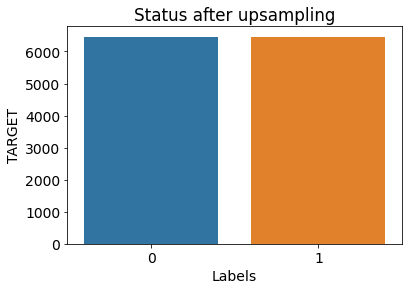

In [113]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','TARGET']
print(oversample_plot)
sns.barplot(x='Labels',y='TARGET',data=oversample_plot);
plt.title('Status after upsampling');

## PCA

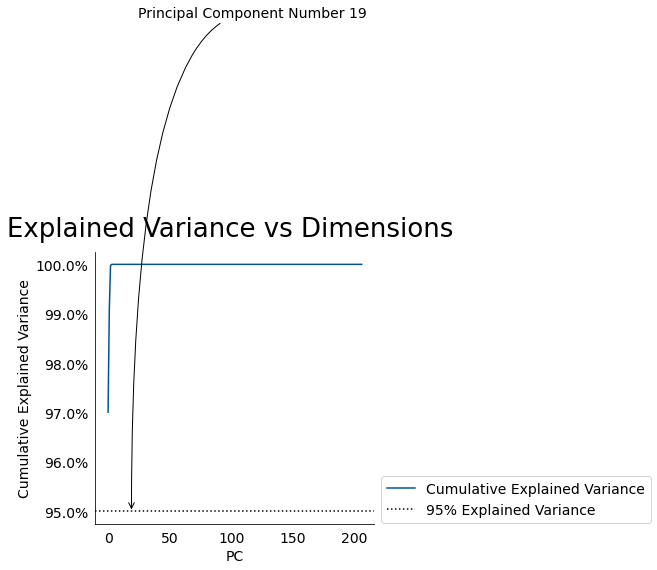

In [114]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(5, 5))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

## Modelling


### 1.   Random Forest





In [115]:
clf1 = RandomForestClassifier(random_state=42)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [116]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_rfc.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [117]:
# Test data performance

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test), y_test))

Test Accuracy Score: 0.9378268448576409
Test Precision: 0.0
Test Recall: 0.0


In [118]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_train, gs_rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 1.0
Test accuracy of Random Forest Classifier is : 0.9378268448576409
[[1614    2]
 [ 105    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1616
           1       0.00      0.00      0.00       105

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.48      1721
weighted avg       0.88      0.94      0.91      1721



### 2. KNeighbors Classifier

In [126]:
clf2 = KNeighborsClassifier()
param2 = {}
param2['classifier__n_neighbors'] = [2,5,10,25,50]
param2['classifier'] = [clf2]

In [127]:
pipeline = Pipeline([('classifier', clf2)])
params = [param2]
gs_knc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_knc.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=2),
 'classifier__n_neighbors': 2}

In [128]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_knc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_knc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_knc.predict(X_test), y_test))

Test Accuracy Score: 0.8582219639744335
Test Precision: 0.11428571428571428
Test Recall: 0.0736196319018405


In [129]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_knc.predict(X_test)
knc_train_acc = accuracy_score(y_train, gs_knc.predict(X_train))
knc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNeighbors Classifier is : {knc_train_acc}")
print(f"Test accuracy of KNeighbors Classifier is : {knc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNeighbors Classifier is : 0.9676470588235294
Test accuracy of KNeighbors Classifier is : 0.8582219639744335
[[1465  151]
 [  93   12]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1616
           1       0.07      0.11      0.09       105

    accuracy                           0.86      1721
   macro avg       0.51      0.51      0.51      1721
weighted avg       0.89      0.86      0.87      1721



### 3. Linear Regression

In [119]:
clf3 = LogisticRegression(random_state=42)
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

In [120]:
pipeline = Pipeline([('classifier', clf3)])
params = [param3]
gs_lr = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_lr.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

{'classifier': LogisticRegression(C=0.01, random_state=42),
 'classifier__C': 0.01,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2'}

In [121]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_lr.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_lr.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_lr.predict(X_test), y_test))

Test Accuracy Score: 0.5740848343986055
Test Precision: 0.49523809523809526
Test Recall: 0.07103825136612021


In [122]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_lr.predict(X_test)
lr_train_acc = accuracy_score(y_train, gs_lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Logistic Regression is : 0.5735294117647058
Test accuracy of Logistic Regression is : 0.5740848343986055
[[936 680]
 [ 53  52]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1616
           1       0.07      0.50      0.12       105

    accuracy                           0.57      1721
   macro avg       0.51      0.54      0.42      1721
weighted avg       0.89      0.57      0.68      1721



## Model Performance Comparison

In [130]:
models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'KNeighbors Classifier', 'Logistic Regression'],
    'Score' : [rfc_test_acc, knc_test_acc, lr_test_acc, ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest Classifier,0.937827
1,KNeighbors Classifier,0.858222
2,Logistic Regression,0.574085


## Conclussion